In [18]:
import abtem
import dask
import numpy as np
from bokeh.io import output_notebook
from ase.cluster import Decahedron

output_notebook()

Loading BokehJS ...

In [2]:
abtem.config.set({"device": "cpu"})
abtem.config.set({"fft": "mkl"})
abtem.config.set({"mkl.threads": 1})

In [3]:
atoms = Decahedron("Au", 6, 2, 0)
atoms.rotate("x", -30)
atoms.center(vacuum=2)

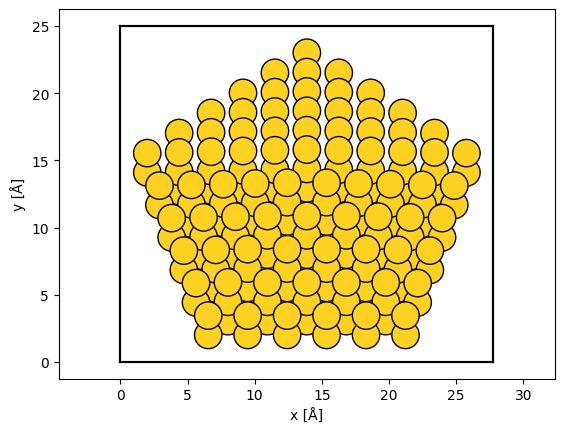

In [4]:
abtem.show_atoms(atoms);

In [54]:
frozen_phonons = abtem.FrozenPhonons(atoms, 8, {"C": 0.0, "Au": 0.}, ensemble_mean=True)

potential = abtem.Potential(
    frozen_phonons,
    gpts=(768,768),
    projection="infinite",
    slice_thickness=2,
)

s_matrix = abtem.SMatrix(
    potential=potential, 
    energy=200e3, 
    semiangle_cutoff=20,
    interpolation=4, 
    downsample=True,
)

scan = abtem.GridScan()

detector = abtem.AnnularDetector(inner=50, outer=150)

measurement = s_matrix.scan(scan=scan, detectors=detector, max_batch_reduction=32)

In [55]:
%%time

#from dask.distributed import performance_report

#with performance_report(filename="dask-report.html"):
measurement, profilers = measurement.compute(resource_profiler=True, profiler=True)

[########################################] | 100% Completed | 69.26 s
CPU times: user 4min 18s, sys: 1min 10s, total: 5min 28s
Wall time: 1min 9s


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

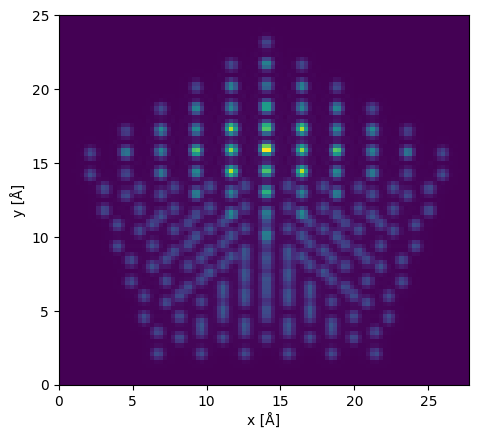

In [56]:
measurement.show()

In [57]:
profilers[0].visualize()

Figure(id='2569', ...)

In [58]:
profilers[1].visualize()

Figure(id='2771', ...)